<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#KNN" data-toc-modified-id="KNN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>KNN</a></span><ul class="toc-item"><li><span><a href="#Standardizing-columns" data-toc-modified-id="Standardizing-columns-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Standardizing columns</a></span></li><li><span><a href="#Train---Test-Split" data-toc-modified-id="Train---Test-Split-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Train - Test Split</a></span></li><li><span><a href="#KNN-fitting" data-toc-modified-id="KNN-fitting-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>KNN fitting</a></span></li><li><span><a href="#Choosing-optimal-K" data-toc-modified-id="Choosing-optimal-K-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Choosing optimal K</a></span></li><li><span><a href="#KNN-with-optimal-K" data-toc-modified-id="KNN-with-optimal-K-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>KNN with optimal K</a></span><ul class="toc-item"><li><span><a href="#Extra" data-toc-modified-id="Extra-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Extra</a></span><ul class="toc-item"><li><span><a href="#Test---Train---CV-Split" data-toc-modified-id="Test---Train---CV-Split-1.5.1.1"><span class="toc-item-num">1.5.1.1&nbsp;&nbsp;</span>Test - Train - CV Split</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-1.5.1.2"><span class="toc-item-num">1.5.1.2&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#K--fold-Cross-validation" data-toc-modified-id="K--fold-Cross-validation-1.5.1.3"><span class="toc-item-num">1.5.1.3&nbsp;&nbsp;</span>K- fold Cross validation</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Naive Bayes</a></span></li></ul></div>

# KNN 

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [190]:
df = pd.read_csv('Classified Data',index_col=0)

In [191]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [192]:
data=df.drop(columns=['TARGET CLASS'])
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


## Standardizing columns

In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
std_data = StandardScaler().fit_transform(data)

In [195]:
std_df=pd.DataFrame(std_data,columns=['WTT','PTI','EQW','SBI','LQE','QWG','FDJ','PJF','HQE','NXJ'])
std_df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train - Test Split

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(std_df,df['TARGET CLASS'], test_size=0.30, random_state=42)

## KNN fitting

In [198]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
knn = KNeighborsClassifier(1)
knn.fit(X_train1,y_train1)

KNeighborsClassifier(n_neighbors=1)

In [201]:
y_pred1=knn.predict(X_test1)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix 

In [202]:
print(confusion_matrix(y_test1,y_pred1))

[[134   8]
 [ 11 147]]


In [203]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



## Choosing optimal K

In [204]:
from sklearn.metrics import accuracy_score

In [205]:
acc_rate1=[]

for i in range(1,35):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train1,y_train1)
    y_pred1=knn.predict(X_test1)
    acc1=accuracy_score(y_test1,y_pred1,normalize=True)*float(100)
    acc_rate1.append(acc1)

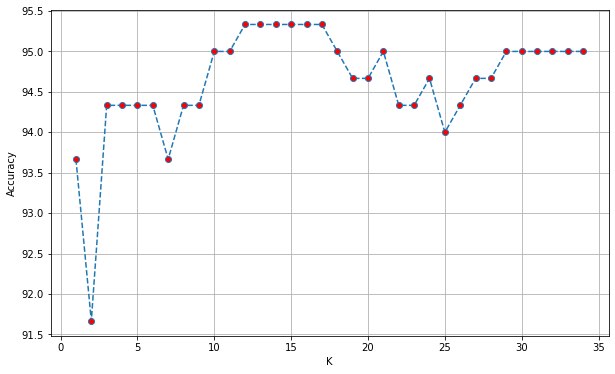

In [206]:
plt.figure(figsize=(10,6))
plt.plot(range(1,35),acc_rate1,marker='o',markerfacecolor='red',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.grid()
plt.show()

## KNN with optimal K

In [208]:
knn_final1= KNeighborsClassifier(13) #k=13  #try choosing k as odd number
knn.fit(X_train1,y_train1)
pred1=knn.predict(X_test1)
print(confusion_matrix(y_test1,pred1))
print(classification_report(y_test1,pred1))

[[135   7]
 [  8 150]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       142
           1       0.96      0.95      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



### Extra 

#### Test - Train - CV Split

In [210]:
from sklearn.model_selection import train_test_split
x_1,x_test,y_1,y_test=train_test_split(std_df,df['TARGET CLASS'],test_size=0.20,random_state=0)

In [211]:
x_train,x_cv,y_train,y_cv=train_test_split(x_1,y_1,test_size=0.30,random_state=0)
x_cv.shape

(240, 10)

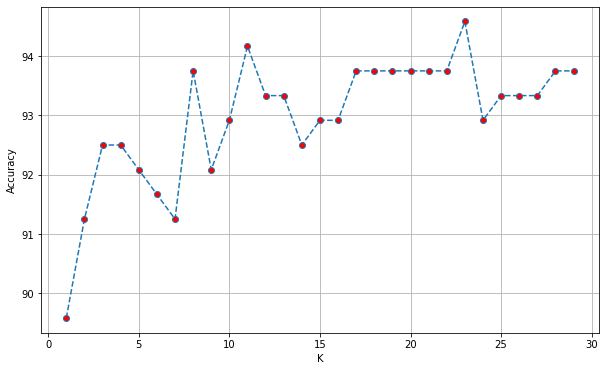

In [219]:
acc_rate=[]
for i in range(1,30):
    knn=KNeighborsClassifier(i)                                  
    knn.fit(x_train,y_train)
    pred=knn.predict(x_cv)              #prediction done on CV rather then test data. 
    acc=accuracy_score(y_cv,pred,normalize=True)*float(100)
    acc_rate.append(acc)

plt.figure(figsize=(10,6))
plt.plot(range(1,30),acc_rate,marker='o',markerfacecolor='red',linestyle='dashed') #19seems to be good
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.grid()
plt.show()

In [213]:
knn=KNeighborsClassifier(19)
knn.fit(x_train,y_train)
pred=knn.predict(x_cv)
print(confusion_matrix(y_cv,pred))
print(classification_report(y_cv,pred))

[[106  10]
 [  5 119]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       116
           1       0.92      0.96      0.94       124

    accuracy                           0.94       240
   macro avg       0.94      0.94      0.94       240
weighted avg       0.94      0.94      0.94       240



In [214]:
# prediction on test
knn=KNeighborsClassifier(19)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 77   9]
 [  4 110]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        86
           1       0.92      0.96      0.94       114

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



#### ROC Curve


In [227]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [224]:
knn=KNeighborsClassifier(23)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

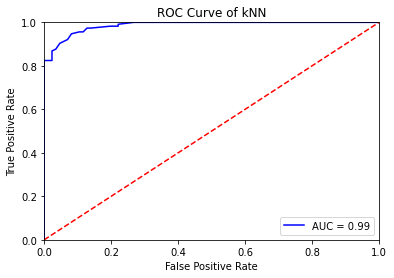

In [236]:
y_scores=knn.predict_proba(x_test)
fpr,tpr,threshold =roc_curve(y_test,y_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

#### K- fold Cross validation

In [174]:
from sklearn.model_selection import cross_val_score

In [215]:
mylist=list(range(1,50,3))
cv_scores=[]

for i in mylist:
    knn=KNeighborsClassifier(i)
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [180]:
#misclassification error
miss_error=[1-x for x in cv_scores]

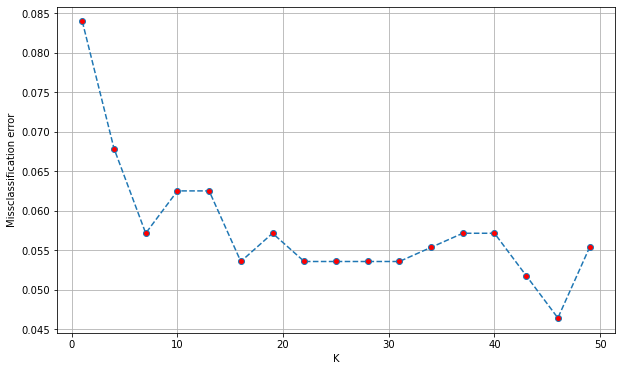

The optimal value of K from the graph seems to be K=23


In [221]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50,3),miss_error,marker='o',markerfacecolor='red',linestyle='dashed')
plt.xlabel('K')
plt.ylabel('Missclassification error')
plt.grid()
plt.show()

print('The optimal value of K from the graph seems to be K=23')

In [216]:
#fitting model for k= 23

knn=KNeighborsClassifier(23)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 76  10]
 [  5 109]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        86
           1       0.92      0.96      0.94       114

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200

